In [143]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [144]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [145]:
NUM_CLASSES = 30


# Dataset reading

In [146]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [147]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [149]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [150]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Batc  (None, 42)               168       
 hNormalization)                                                 
                                                                 
 dense_32 (Dense)            (None, 128)               5504      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                      

In [151]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [152]:
# Model compilation
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [153]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/19 [===========================>..] - ETA: 0s - loss: 5.2257 - accuracy: 0.0794 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
19/19 [==============================] - 1s 18ms/step - loss: 5.2132 - accuracy: 0.0818 - val_loss: 4.9823 - val_accuracy: 0.1877
Epoch 2/1000
 1/19 [>.............................] - ETA: 0s - loss: 5.0468 - accuracy: 0.1250
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
19/19 [==============================] - 0s 7ms/step - loss: 4.7780 - accuracy: 0.1574 - val_loss: 4.6879 - val_accuracy: 0.1589
Epoch 3/1000
 1/19 [>.............................] - ETA: 0s - loss: 4.6226 - accuracy: 0.1562
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
19/19 [==============================] - 0s 6ms/step - loss: 4.4234 - accuracy: 0.1779 - val_loss: 4.3640 - val_accuracy: 0.1815
Epoch 4/1000
 1/19 [>.............................] - ETA: 0s - loss: 4.2445 - accuracy: 0.1

In [154]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 2ms/step - loss: 0.7504 - accuracy: 0.8773


In [155]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path, compile=False)

In [156]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 103ms/step
[3.05381220e-10 8.04582145e-04 1.06369407e-05 2.11287943e-09
 3.66719576e-07 7.37923503e-01 1.01307605e-14 1.92917582e-06
 4.45752994e-05 1.49128900e-04 1.09718621e-05 5.07652365e-10
 1.87540991e-07 9.34226136e-06 4.95475490e-07 9.88688686e-09
 7.92225765e-04 1.59041438e-08 4.94788155e-10 2.37692267e-01
 1.45772159e-08 1.21176580e-09 1.45142039e-05 3.26831941e-05
 1.78894188e-05 2.38345677e-10 3.27436719e-04 1.21549470e-04
 1.99907078e-07 2.20455471e-02]
5


# Confusion matrix

25/25 [==============================] - 0s 1ms/step


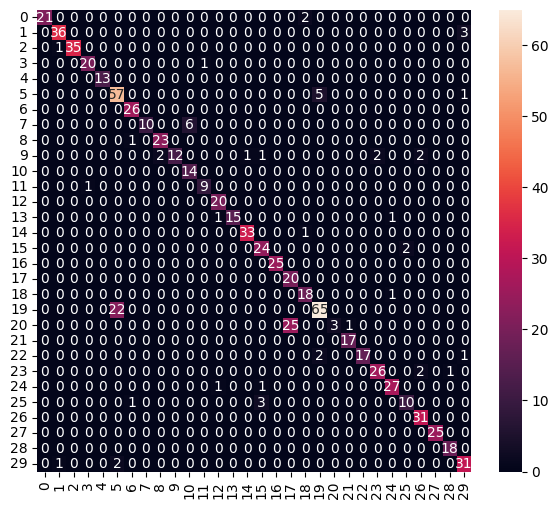

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.95      0.92      0.94        39
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        21
           4       1.00      1.00      1.00        13
           5       0.70      0.90      0.79        63
           6       0.93      1.00      0.96        26
           7       1.00      0.62      0.77        16
           8       0.92      0.96      0.94        24
           9       1.00      0.60      0.75        20
          10       0.70      1.00      0.82        14
          11       0.90      0.90      0.90        10
          12       0.91      1.00      0.95        20
          13       1.00      0.88      0.94        17
          14       0.97      0.97      0.97        34
          15       0.83      0.92      0.87        26
          16       1.00      1.00      1.00        25
     

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [158]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [159]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Usuario\AppData\Local\Temp\tmpha_98938\assets


INFO:tensorflow:Assets written to: C:\Users\Usuario\AppData\Local\Temp\tmpha_98938\assets


23504

# Inference test

In [160]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [161]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [162]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [163]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [164]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.52670032e-10 7.87791563e-04 1.10472856e-05 2.38511655e-09
 3.87709804e-07 7.32332885e-01 1.21859733e-14 2.17879642e-06
 4.69912557e-05 1.61391334e-04 1.16557803e-05 5.55031077e-10
 1.90545109e-07 9.11991810e-06 5.38987138e-07 1.06414655e-08
 7.74063927e-04 1.81086133e-08 5.76336867e-10 2.43071929e-01
 1.66001044e-08 1.35072142e-09 1.47217734e-05 3.36297417e-05
 1.87696933e-05 2.64829797e-10 3.35583114e-04 1.24556784e-04
 2.14445151e-07 2.22623106e-02]
5
